In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
#print(os.getcwd())
books = pd.read_csv('/home/ShardulB/College/Degree/Final Year Project/Online Library/Code/books.csv', usecols=['isbn', 'title', 'work_id', 'authors', 'original_publication_year', 'small_image_url', 'image_url'])
#books.columns = []
# users = pd.read_csv('/home/ShardulB/College/Degree/Final Year Project/Online Library/Code/to_read.csv')
# users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('/home/ShardulB/College/Degree/Final Year Project/Online Library/Code/ratings1.csv')
ratings.columns = ['user_id', 'work_id', 'rating']

In [4]:
print(ratings.shape)
print(list(ratings.columns))

(41748, 3)
['user_id', 'book_id', 'rating']


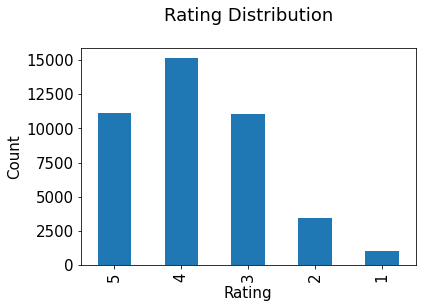

In [2]:
plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [3]:
print(books.shape)
print(list(books.columns))

(10000, 6)
['isbn', 'authors', 'original_publication_year', 'title', 'image_url', 'small_image_url']


In [6]:
# print(users.shape)
# print(list(users.columns))

In [ ]:
# users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
# plt.title('Age Distribution\n')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.savefig('system2.png', bbox_inches='tight')
# plt.show()

In [7]:
counts1 = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(counts1[counts1 >= 200].index)]
counts = ratings['rating'].value_counts()
ratings = ratings[ratings['rating'].isin(counts[counts >= 100].index)]

In [9]:
combine_book_rating = pd.merge(ratings, books, on='work_id')
columns = ['original_publication_year', 'authors', 'small_image_url', 'image_url']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

KeyError: 'work_id'

In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

In [ ]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

In [ ]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

In [ ]:
rating_popular_book.shape

In [ ]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()